In [1]:
%cd /home/hjh/rs-paint

/home/hjh/rs-paint


In [2]:
from ldm.data.remote_sensing import RemoteSensingDataset, IDX2LABEL
import numpy as np
import matplotlib.pyplot as plt

/home/hjh/miniconda3/envs/rspaint/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def unnormalize(x):
    mean = np.array([0.48145466, 0.4578275, 0.40821073])
    std = np.array([0.26862954, 0.26130258, 0.27577711])
    return ((x * std + mean) * 255).astype(np.uint8)

In [4]:
dataset = RemoteSensingDataset(state='train', arbitrary_mask_percent=1, dataset_dir='/home/hjh/dataset/SAMRS/paint', image_size=512)

/home/hjh/dataset/SAMRS/paint/images/train/00006.png
Class: ship


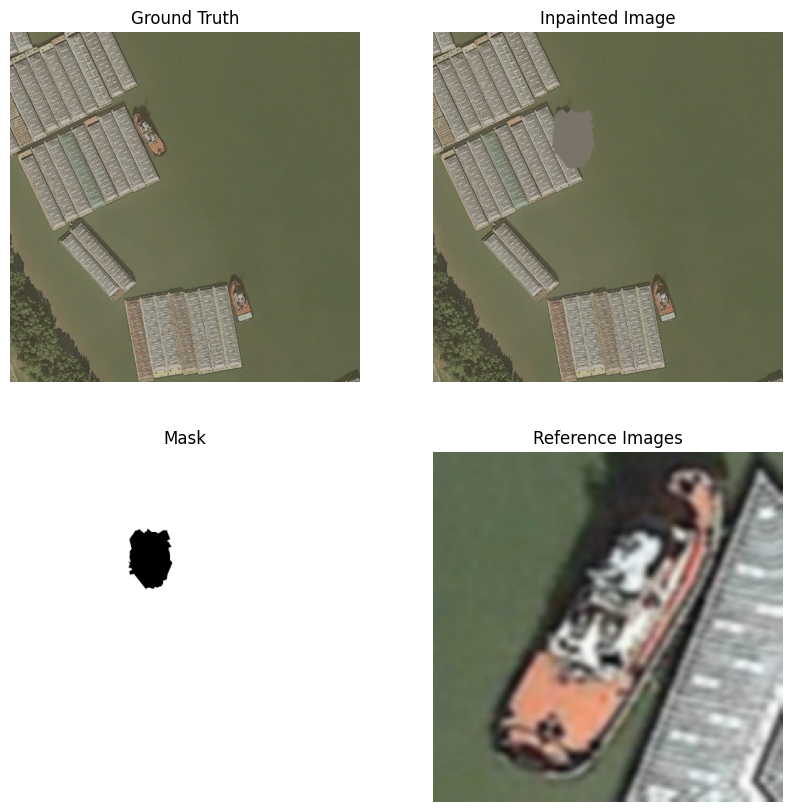

In [ ]:
dataitem = dataset[4]
class_name = dataitem['class_name']
gt = dataitem['GT'].numpy()
mask = dataitem['inpaint_mask'].numpy()
ref_imgs = dataitem['ref_imgs'].numpy()
inpaint_img = dataitem['inpaint_image'].numpy()

mask = mask[0]
mask = (mask * 255).astype(np.uint8)

inpaint_img = inpaint_img.transpose(1, 2, 0)
inpaint_img = unnormalize(inpaint_img)

gt = gt.transpose(1, 2, 0)
gt = unnormalize(gt)

ref_imgs = ref_imgs.transpose(1, 2, 0)
ref_imgs = unnormalize(ref_imgs)

print('Class:', class_name)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot ground truth image
axs[0, 0].imshow(gt)
axs[0, 0].set_title('Ground Truth')
axs[0, 0].axis('off')

# Plot inpainted image
axs[0, 1].imshow(inpaint_img)
axs[0, 1].set_title('Masked Image')
axs[0, 1].axis('off')

# Plot mask
axs[1, 0].imshow(mask, cmap='gray')
axs[1, 0].set_title('Mask')
axs[1, 0].axis('off')

# Plot reference images
axs[1, 1].imshow(ref_imgs)
axs[1, 1].set_title('Reference Images')
axs[1, 1].axis('off')

plt.show()